In [171]:
import numpy as np
import pandas as pd

In [172]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import KBinsDiscretizer

from sklearn.compose import ColumnTransformer

In [173]:
train = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day32-binning-and-binarization/train.csv"

# Loading Dataset

# ▶ Binning


In [174]:
df1 = pd.read_csv(train)[['Age','Fare','Survived']]

In [175]:
df1.dropna(inplace=True)

In [176]:
df1.shape

(714, 3)

In [177]:
df1.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


## Without binning


In [178]:
X = df1.iloc[:,:2]
y = df1.iloc[:,-1]

In [179]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [180]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [181]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6503496503496503

In [182]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.630320813771518

## Applying binning


In [183]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fair = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [184]:
trf = ColumnTransformer([
    ('First',kbin_age,[0]),
    ('Second',kbin_fair,[1])
],remainder='passthrough')

In [185]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)


In [186]:
trf.named_transformers_['First'].n_bins_


array([10])

In [187]:
trf.named_transformers_['First'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [188]:
output = pd.DataFrame({'age':X_train['Age'],
                        'age_trf':X_train_trf[:,0],
                        'fare':X_train['Fare'],
                        'fare_trf':X_train_trf[:,1
                                               ]})

In [189]:
output['age_labels'] = pd.cut(x=X_train['Age'],bins=trf.named_transformers_['First'].bin_edges_[0].tolist())
output['fair_labels'] = pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['Second'].bin_edges_[0].tolist())


In [190]:
output.head()

,age,age_trf,fare,fare_trf,age_labels,fair_labels
328,31.0,5.0,20.5250,5.0,"(28.5, 32.0]","(15.75, 26.0]"
73,26.0,4.0,14.4542,4.0,"(25.0, 28.5]","(13.0, 15.75]"
253,30.0,5.0,16.1000,5.0,"(28.5, 32.0]","(15.75, 26.0]"
719,33.0,6.0,7.7750,1.0,"(32.0, 36.0]","(7.75, 7.896]"
666,25.0,4.0,13.0000,4.0,"(22.0, 25.0]","(9.225, 13.0]"


In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)


    trf = ColumnTransformer([
        ('First',kbin_age,[0]),
        ('Second',kbin_fare,[1])
    ])

    Xtrf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),Xtrf,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(10,6))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title(f'Before {strategy}')

    plt.subplot(122)
    plt.hist(Xtrf[:,0],color = "red")
    plt.title(f'After {strategy}')

    plt.show()


0.6864632237871675


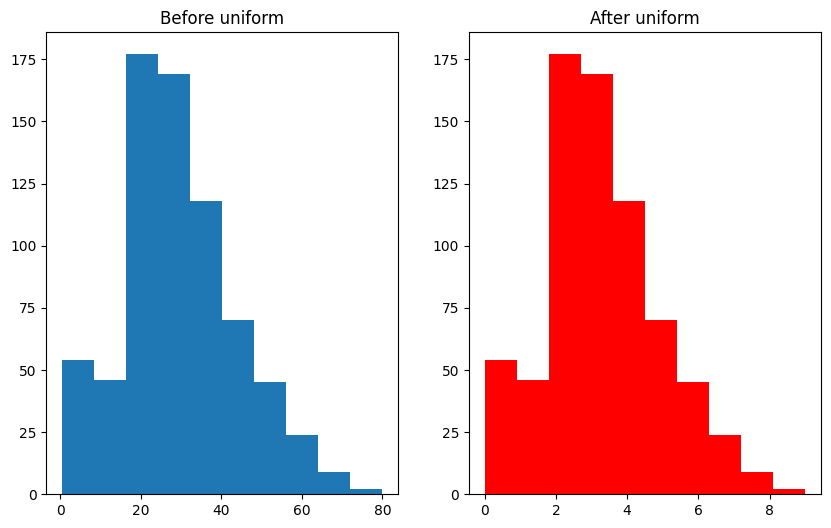

0.682140062597809


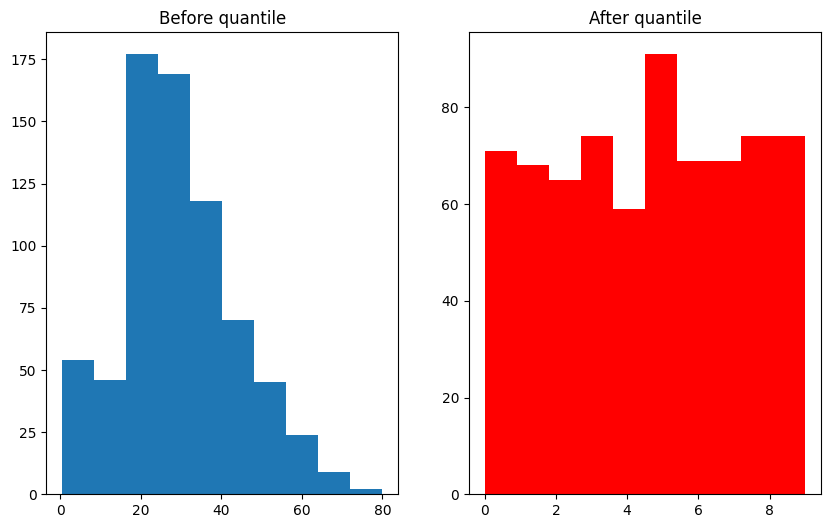

0.6655320813771518


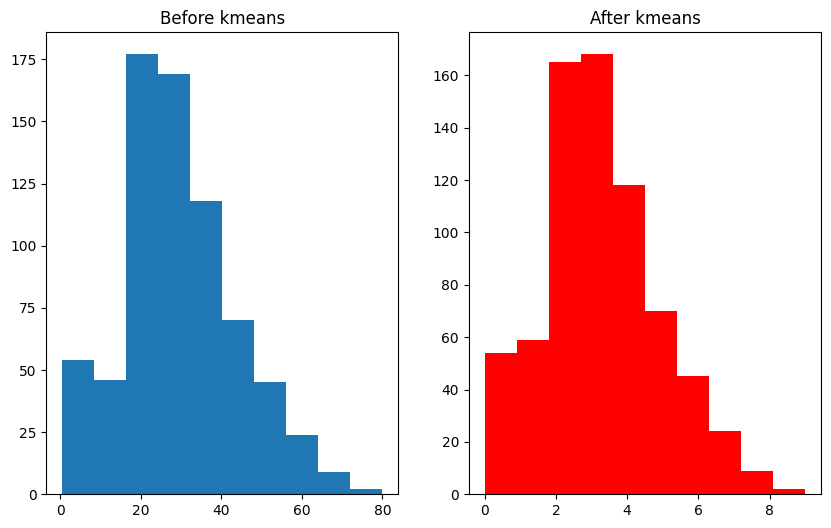

In [193]:
x = ["uniform","quantile","kmeans"]
for i in x:
  discretize(10,i)

# ▶ Binerization

In [194]:
df = pd.read_csv(train)[['Age','Fare','SibSp','Parch','Survived']]

In [195]:
df.dropna(inplace=True)

In [196]:
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [197]:
df['family'] = df['SibSp'] + df['Parch']

In [198]:
df.head()

,Age,Fare,SibSp,Parch,Survived,family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0


In [199]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [200]:
df.head()

,Age,Fare,Survived,family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [201]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [202]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [203]:
X_train.head()

,Age,Fare,family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


# Without binarization

In [204]:
# Without binarization

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6223776223776224

In [205]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6484937402190925

## Applying Binarization

In [206]:
# Applying Binarization

from sklearn.preprocessing import Binarizer

In [207]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [208]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [209]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [210]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6083916083916084

In [211]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6332355242566511